# Usability test of WYRED Platform

<h3>Importation of the required libraries and reading of the CSV file that contains all the questionnaire responses</h3>

In [1]:
import pandas as pd
import numpy as np
from termcolor import colored
from scipy import stats
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 1000

df = pd.read_csv('results-survey314447.csv', sep=',')

In [2]:
df

,ID de respuesta,Fecha de envío,Última página,Lenguaje inicial,Fecha de inicio,Fecha de la última acción,Año de nacimiento,Indica tu género,¿Dónde has nacido?,¿Dónde has nacido? [Otro],¿Dónde nació tu padre?,¿Dónde nació tu padre? [Otro],¿Dónde nació tu madre?,¿Dónde nació tu madre? [Otro],¿Qué idioma se habla principalmente en tu familia?,¿Qué idioma se habla principalmente en tu familia? [Otro],"¿Tienes alguna enfermedad, problema de salud o discapacidad relacionada con la vista?","¿Tienes alguna enfermedad, problema de salud o discapacidad relacionada con la vista? [Otro]",¿Has sido facilitador/a en la plataforma WYRED?,¿En qué idiomas has utilizado la plataforma? [Alemán],¿En qué idiomas has utilizado la plataforma? [Español],¿En qué idiomas has utilizado la plataforma? [Hebreo],¿En qué idiomas has utilizado la plataforma? [Inglés],¿En qué idiomas has utilizado la plataforma? [Italiano],¿En qué idiomas has utilizado la plataforma? [Turco],"Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Creo que me gustaría utilizar esta plataforma frecuentemente]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Encuentro la plataforma innecesariamente compleja]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Pienso que la plataforma es fácil de usar]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Creo que necesitaría soporte técnico para hacer uso de la plataforma]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Encuentro las diversas funciones de la plataforma bastante bien integradas]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [He encontrado demasiada inconsistencia en la plataforma]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Creo que la mayoría de la gente podría aprender a usar la plataforma rápidamente]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [He encontrado la plataforma complicada de usar]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [La plataforma me transmite confianza y seguridad]","Indica tu grado de acuerdo o desacuerdo para cada una de las siguientes afirmaciones, matizando la respuesta entre los valores 1 (muy en desacuerdo), 2 (en desacuerdo), 3 (ni de acuerdo ni en desacuerdo), 4 (de acuerdo), 5 (totalmente de acuerdo) [Neces

<h3>Cleaning the dataset</h3>
<ul>
<li>1) Drop the rows that have NaN values on the column "Fecha de envío" (Sent date of the questionnaire), because these rows will not cointain any valuable responses.</li>
<li>2) Rename the columns to reduce verbosity in column names</li>
<li>3) Substract the valuable columns for the analysis (discarding all the questionnaire metadata)</li>
</ul>

In [3]:
df_clean = df.dropna(subset=['Fecha de envío'])

df_clean.columns.values[1] = 'Date_SUS'
df_clean.columns.values[6] = 'Birthdate'
df_clean.columns.values[7] = 'Gender'
df_clean.columns.values[8] = 'Birthplace'
df_clean.columns.values[9] = 'Birthplace_Other'
df_clean.columns.values[10] = 'Birthplace_Father'
df_clean.columns.values[11] = 'Birthplace_Father_Other'
df_clean.columns.values[12] = 'Birthplace_Mother'
df_clean.columns.values[13] = 'Birthplace_Mother_Other'
df_clean.columns.values[14] = 'Family_Language'
df_clean.columns.values[15] = 'Family_Language_Other'
df_clean.columns.values[16] = 'Sight_Problems'
df_clean.columns.values[17] = 'Sight_Problems_Other'
df_clean.columns.values[18] = 'WYRED_Facilitator'
df_clean.columns.values[19] = 'WYRED_Language_German'
df_clean.columns.values[20] = 'WYRED_Language_Spanish'
df_clean.columns.values[21] = 'WYRED_Language_Hebrew'
df_clean.columns.values[22] = 'WYRED_Language_English'
df_clean.columns.values[23] = 'WYRED_Language_Italian'
df_clean.columns.values[24] = 'WYRED_Language_Turkish'
df_clean.columns.values[25] = 'SUS_1'
df_clean.columns.values[26] = 'SUS_2'
df_clean.columns.values[27] = 'SUS_3'
df_clean.columns.values[28] = 'SUS_4'
df_clean.columns.values[29] = 'SUS_5'
df_clean.columns.values[30] = 'SUS_6'
df_clean.columns.values[31] = 'SUS_7'
df_clean.columns.values[32] = 'SUS_8'
df_clean.columns.values[33] = 'SUS_9'
df_clean.columns.values[34] = 'SUS_10'
df_clean.columns.values[35] = 'Comments'

df_clean = df_clean[['Date_SUS', 'Birthdate', 'Gender', 'Birthplace', 'Birthplace_Other', 'Birthplace_Father', 'Birthplace_Father_Other',
         'Birthplace_Mother', 'Birthplace_Mother_Other', 'Family_Language', 'Family_Language_Other',
         'Sight_Problems', 'Sight_Problems_Other', 'WYRED_Facilitator', 'WYRED_Language_German',
         'WYRED_Language_Spanish', 'WYRED_Language_Hebrew', 'WYRED_Language_English', 'WYRED_Language_Italian',
         'WYRED_Language_Turkish', 'SUS_1', 'SUS_2', 'SUS_3', 'SUS_4', 'SUS_5', 'SUS_6', 'SUS_7', 'SUS_8',
         'SUS_9', 'SUS_10', 'Comments']]

In [4]:
df_clean

,Date_SUS,Birthdate,Gender,Birthplace,Birthplace_Other,Birthplace_Father,Birthplace_Father_Other,Birthplace_Mother,Birthplace_Mother_Other,Family_Language,Family_Language_Other,Sight_Problems,Sight_Problems_Other,WYRED_Facilitator,WYRED_Language_German,WYRED_Language_Spanish,WYRED_Language_Hebrew,WYRED_Language_English,WYRED_Language_Italian,WYRED_Language_Turkish,SUS_1,SUS_2,SUS_3,SUS_4,SUS_5,SUS_6,SUS_7,SUS_8,SUS_9,SUS_10,Comments
2,2017-12-19 14:03:36,1998.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Otro,Astigmatismo,No,No,Sí,No,No,No,No,4.0,3.0,4.0,4.0,3.0,2.0,5.0,1.0,3.0,5.0,NaN
5,2017-12-19 14:06:03,1999.0,Masculino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Miopía degenerativa,NaN,No,No,Sí,No,No,No,No,2.0,4.0,2.0,3.0,3.0,3.0,2.0,4.0,3.0,3.0,NaN
7,2017-12-19 14:11:25,1997.0,Femenino,Belgium – Flemish Community,NaN,Belgium – Flemish Community,NaN,Belgium – Flemish Community,NaN,Dutch,NaN,NaN,NaN,Sí,No,Sí,No,No,No,No,3.0,3.0,5.0,2.0,3.0,2.0,4.0,1.0,4.0,1.0,NaN
8,2017-12-19 14:12:00,1995.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Otro,Astigmatismo,No,No,No,No,Sí,No,No,2.0,2.0,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,Creo que la plataforma tendría que estar operativa en todos los idiomas.
9,2017-12-19 14:14:58,1994.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Otro,Astigmatismo e hipermetropía,No,No,No,No,Sí,No,No,2.0,3.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,4.0,Que no de problemas a la hora de introducir la contraseña
10,2017-12-19 14:10:54,1999.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,NaN,NaN,No,No,No,No,Sí,No,No,2.0,3.0,4.0,4.0,2.0,2.0,5.0,2.0,4.0,1.0,NaN
11,2017-12-19 14:13:30,1996.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Otro,Astigmatismo e hipermetropía,No,No,No,No,Sí,No,No,2.0,3.0,3.0,4.0,3.0,2.0,3.0,3.0,2.0,2.0,"Es una plataforma difícil de comenzar a usar, después es muy intuitiva pero hasta el momento en que empiezas a usar el foro es fácil"
12,2017-12-19 14:16:40,1995.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Catalan,NaN,Otro,Miopía y astigmatismo,Sí,No,Sí,No,No,No,No,3.0,4.0,2.0,3.0,3.0,3.0,2.0,4.0,3.0,4.0,"Me gustaría que si escoges totalmente el idioma de español, estuviera totalmente en español y no mezclando el inglés."
13,2017-12-19 14:16:00,1999.0,Femenino,Spain,NaN,Spain,NaN,Spain,NaN,Spanish,NaN,Miopía degenerativa,NaN,No,No,Sí,No,No,No,No,3.0,1.0,4.0,1.0,4.0,1.0,5.0,1.0,4.0,1.0,NaN
14,2017-12-19 14:24:32,1997.0,Femenino,China,NaN,China,NaN,China,NaN,Chinese,NaN,NaN,NaN,Sí,No,Sí,No,No,No,No,4.0,1.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4.0,NaN


<h3>SUS Score calculation for each participant</h3>
<br>
"To calculate the SUS score, first sum the score contributions from each item. Each item's
score contribution will range from 0 to 4. <br>For items 1,3,5,7,and 9 the score contribution is the
scale position minus 1. <br>For items 2,4,6,8 and 10, the contribution is 5 minus the scale position.
<br>Multiply the sum of the scores by 2.5 to obtain the overall value of SU.
SUS scores have a range of 0 to 100." 
<br><br>[Brooke, J. (1996). SUS-A quick and dirty usability scale. Usability evaluation in industry, 189(194), 4-7]

In [5]:
df_clean[['SUS_1', 'SUS_3', 'SUS_5', 'SUS_7', 'SUS_9']] -= 1 
df_clean[['SUS_2', 'SUS_4', 'SUS_6', 'SUS_8', 'SUS_10']] = 5 - df_clean[['SUS_2', 'SUS_4', 'SUS_6', 'SUS_8', 'SUS_10']].copy()

df_clean['SUS_TOTAL'] = 2.5 * (df_clean['SUS_1'] + df_clean['SUS_2'] + df_clean['SUS_3'] + df_clean['SUS_4'] + df_clean['SUS_5'] + df_clean['SUS_6'] + df_clean['SUS_7'] + df_clean['SUS_8'] + df_clean['SUS_9'] + df_clean['SUS_10'])

<h3>SUS Score mean</h3>
<br>
According to the literature, this value (65.23) falls close to the 50th percentile (which means that the system has an acceptable level of usability) as the average score of SUS is 68.00 
<br>[Sauro, J. (2011). A practical guide to the System Usability Scale: Background, benchmarks & best practices. Denver, CO: Measuring Usability LLC].

<br>
On the other hand, the value obtained also falls between the "OK" and "Good" ranges of the categorical scale made by Bangor. 
<br>[Bangor, A., Kortum, P., & Miller, J. (2009). Determining What Individual SUS Scores Mean: Adding an Adjective Rating Scale. Journal of Usability Studies, 4(3), 114-123]

In [6]:
df_clean['SUS_TOTAL'].mean()

65.232558139534888

<h3>Some considerations</h3>

A technical error was found on the platform during the system testing. It was solved on 27-12-207.
<br><br>
A total of 30 participants tested the system before the fix, 2 of them pointing out the problem in the "Comments" section. For this set of users, the SUS score is lower (64.67).
<br><br>
The 13 participants that tested the system after the fix scored it better (with an average score of 66.54).

In [7]:
df_clean[(df_clean['Date_SUS'] < '2017-12-27')]['SUS_TOTAL'].mean()

64.666666666666671

In [8]:
df_clean[(df_clean['Date_SUS'] >= '2017-12-27')]['SUS_TOTAL'].mean()

66.538461538461533

<h3>Learnability and Usability</h3>
<br>
Although the SUS was originally developed to provide a single score to indicate the (perceived) usability of a system [Brooke, J. (2013). SUS: a retrospective. Journal of usability studies, 8(2), 29-40.], subsequent studies pointed out the two-dimensional nature of this scale [Lewis, J. R., & Sauro, J. (2009, July). The factor structure of the system usability scale. In International conference on human centered design (pp. 94-103). Springer, Berlin, Heidelberg.].
<br><br>
Learnability can be calculated through items 4 and 10 (following the same scoring method as the original SUS score) but instead of multiplying it by 2.5 (to obtain a 0-100 scale from a 0-40 scale), we need to multiply the results by 12.5 (to obtain a 0-100 scale from a 0-8 scale).
<br><br>
In the same way, we can calculate usability with the remaining items, multiplying them by 3.125 to (to obtain a 0-100 scale from a 0-32 scale).

In [9]:
df_clean['Learnability'] = 12.5 * (df_clean['SUS_4'] + df_clean['SUS_10'])
df_clean['Usability'] = 3.125 * (df_clean['SUS_1'] + df_clean['SUS_2'] + df_clean['SUS_3'] + df_clean['SUS_5'] + df_clean['SUS_6'] + df_clean['SUS_7'] + df_clean['SUS_8'] + df_clean['SUS_9'])

The previous interpretation is applicable. As the results show, learnability (66.28) is more close to the SUS average than usability (64.97), but both values are close to the 50th percentile and can be considered acceptable.

In [10]:
df_clean['Learnability'].mean()

66.279069767441854

In [11]:
df_clean['Usability'].mean()

64.970930232558146

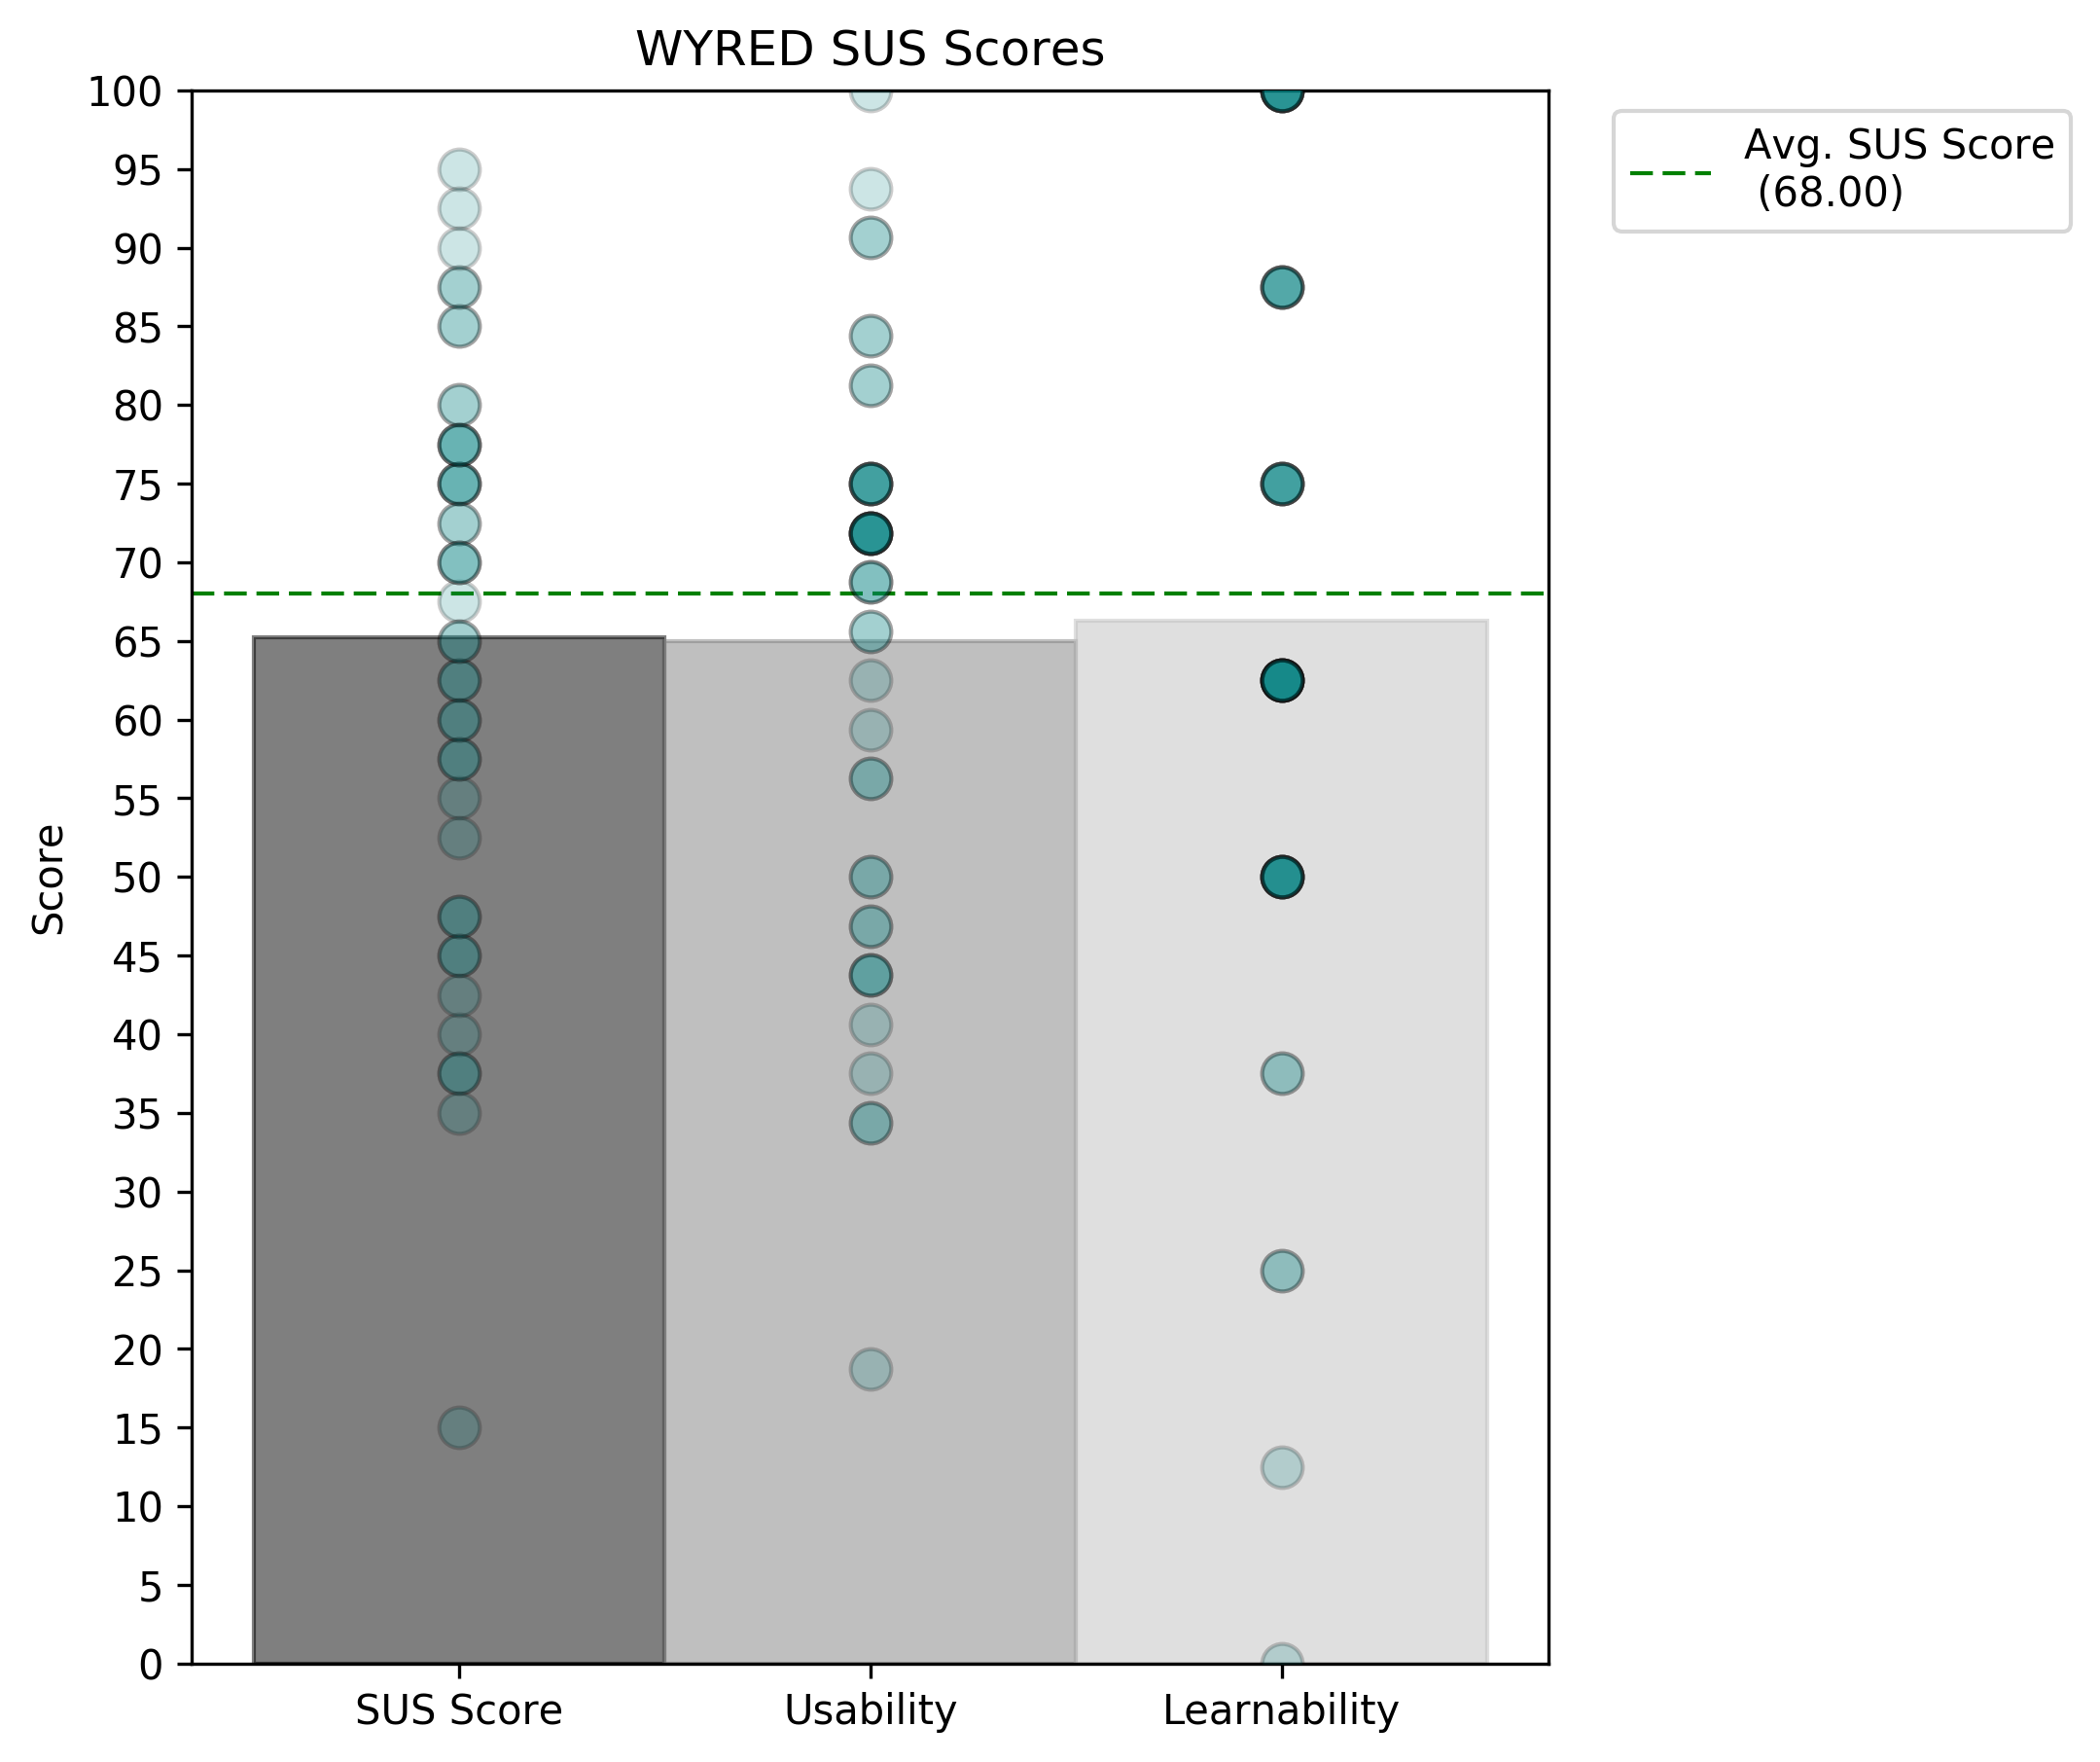

In [12]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(6, 7), dpi=300, facecolor='w', edgecolor='k')
 
x = ('SUS Score', 'Usability', 'Learnability')
y_pos = [3,3.5,4] 
score = [65.23,64.97,66.28]

barlist = plt.bar(y_pos, score, align='center', alpha=0.5, width=[0.5, 0.5, 0.5])
barlist[0].set_color('black')
barlist[1].set_color('grey')
barlist[2].set_color('silver')

plt.xticks(y_pos, x)
plt.ylim([0, 100])
plt.ylabel('Score')
plt.yticks(np.arange(0, 101, 5.0))
plt.axhline(68, color='g', linestyle='dashed', linewidth=1, label="Avg. SUS Score\n (68.00)")
plt.legend(bbox_to_anchor=(1.4, 1.0))

plt.scatter([3] * df_clean['SUS_TOTAL'].shape[0], df_clean['SUS_TOTAL'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)
plt.scatter([3.5] * df_clean['Usability'].shape[0], df_clean['Usability'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)
plt.scatter([4] * df_clean['Learnability'].shape[0], df_clean['Learnability'], s=100, color='teal', linewidth=1, edgecolor='black', alpha=0.2, zorder=3)

plt.title('WYRED SUS Scores')
 
plt.show()

<h3>Learnability and Usability (taking into account the technical error)</h3>

<h4>Learnability and Usability results before the system fix</h4>

In [13]:
print "Learnability: " + str(df_clean[(df_clean['Date_SUS'] < '2017-12-27')]['Learnability'].mean())
print "Usability: " + str(df_clean[(df_clean['Date_SUS'] < '2017-12-27')]['Usability'].mean())

Learnability: 65.4166666667
Usability: 64.4791666667


<h4>Learnability and Usability results after the system fix</h4>

In [14]:
print "Learnability: " + str(df_clean[(df_clean['Date_SUS'] >= '2017-12-27')]['Learnability'].mean())
print "Usability: " + str(df_clean[(df_clean['Date_SUS'] >= '2017-12-27')]['Usability'].mean())

Learnability: 68.2692307692
Usability: 66.1057692308


<h3>Comments</h3>

As it has been said before, the negative comments pointed out the technical error and other issues like the language of the platform ('it should be operative in all languages' and 'if you choose one language the platform should be completely in that language') and the initial questionnaire to access the system ('unnecessary/awkward questions'). 
<br>
In addition, some users pointed out that the platform is difficult to use at the beggining, but then it becomes more easy and intuitive.
<br><br>
In the majority of comments, participants perceive it as a simple, helpful and useful platform.

In [15]:
def print_comments_score(x):
    global all_comments
    if x.Comments is not np.nan:
        if x.SUS_TOTAL >= 68:
            color = 'green'
        else:
            color = 'red'
        print colored(str(x.SUS_TOTAL) + ": \n" + str(x.Comments), color)
        print "\n"
        
df_clean.apply(print_comments_score, axis=1)
print

55.0: 
Creo que la plataforma tendría que estar operativa en todos los idiomas. 


40.0: 
Que no de problemas a la hora de introducir la contraseña


47.5: 
Es una plataforma difícil de comenzar a usar, después es muy intuitiva pero hasta el momento en que empiezas a usar el foro es fácil


37.5: 
Me gustaría que si escoges totalmente el idioma de español, estuviera totalmente en español y no mezclando el inglés. 


80.0: 
En los hilos de conversación, si deseas subir una imagen puede ser un poco lioso, en ese aspecto creo que se debería simplificar como en cualquier otra plataforma.
Por otro lado, al principio nos encontrábamos un poco perdidos pero una vez investigado ya fue muy fácil.


77.5: 
Me parece una buena forma para llegar a un acuerdo.


95.0: 
La plataforma me ha parecido muy fácil de usar, sencilla y muy práctica. Además, la considero muy útil para crear debates y que todo el mundo pueda dejar su opinión de una manera clara, directa y ordenada. 


75.0: 
Me ha parecido un